# Multiclass Classification

def: binary classifier distinguish between two classes,multiclass classifier(also called multinomial classifier) can distinguish between more than two classes.

-->Random Forest classifier ,and naive  Bayesclassifier are capable of handling multiple classes natively.

-->Logistic Regression or Support Vector Machine Classifiers are strictly binary classifiers

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Predict on a new sample
some_digit = X_test[0]  # Use a sample from the test data for demonstration
prediction = svm_clf.predict([some_digit])
print("Predicted class:", prediction)


Predicted class: [1]


In [19]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores

array([0.34887096])

In [20]:
np.argmax(some_digit_scores)

0

In [21]:
svm_clf.classes_

array([0, 1])

In [22]:
svm_clf.classes_[1]

1

In [23]:
from sklearn.multiclass import OneVsRestClassifier

In [24]:
ovr_clf=OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC())

In [25]:
ovr_clf.predict([some_digit])

array([1])

In [26]:
len(ovr_clf.estimators_)

1

In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier

In [28]:
# Ensure that X_train is of type np.float64
X_train = X_train.astype(np.float64)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Perform cross-validation
sgd_clf = SGDClassifier(random_state=42)
cv_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

# Print cross-validation scores
print(cv_scores)


[0.82397004 0.82397004 0.84962406]


# Error Analysis

In [29]:
X_train = X_train.astype(np.float64)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Perform cross-validation
sgd_clf = SGDClassifier(random_state=42)
cv_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")


In [30]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
# Assuming X_train_scaled and y_train are already defined
# Initialize the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Get predictions using cross-validation
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

# Compute the confusion matrix
conf_mx = confusion_matrix(y_train, y_train_pred)

# Print the confusion matrix
print(conf_mx)


[[349  58]
 [ 76 317]]


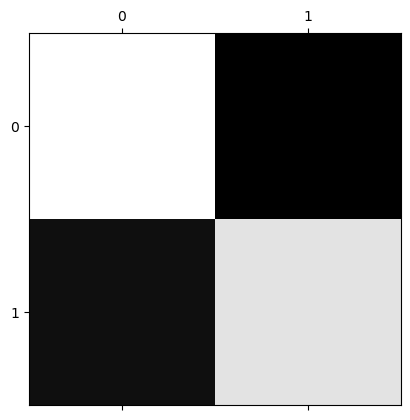

In [31]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

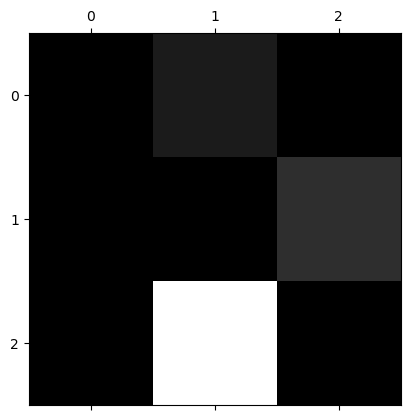

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load a sample dataset (Iris dataset with 3 classes)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Get predictions using cross-validation
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

# Compute the confusion matrix
conf_mx = confusion_matrix(y_train, y_train_pred)

# Sum of each row (axis=1 means summing across columns)
rows_sums = conf_mx.sum(axis=1, keepdims=True)

# Normalize the confusion matrix by dividing each element by the sum of its row
norm_conf_mx = conf_mx / rows_sums

# Set the diagonal values to 0, to exclude them from the visualization
np.fill_diagonal(norm_conf_mx, 0)

# Visualize the normalized confusion matrix using a grayscale colormap
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


In [33]:
cl_a,cl_b=3,5
X_aa=X_train[(y_train==cl_a)& (y_train_pred==cl_a)]
x_ab=X_train[(y_train==cl_a)& (y_train_pred==cl_b)]
x_ba=X_train[(y_train==cl_b)& (y_train_pred==cl_a)]
x_bb=X_train[(y_train==cl_b)& (y_train_pred==cl_b)]

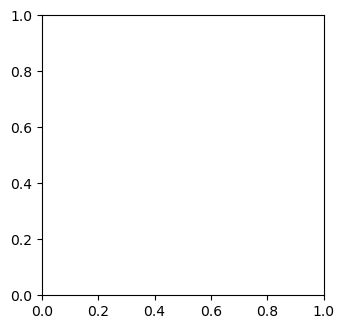

<Figure size 1000x0 with 0 Axes>

NameError: name 'X_ab' is not defined

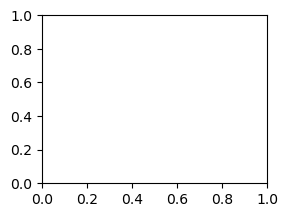

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot a grid of digits
def plot_digits(X, images_per_row=5):
    # Set up the number of rows
    images_per_column = int(np.ceil(len(X) / images_per_row))
    
    plt.figure(figsize=(images_per_row * 2, images_per_column * 2))  # Adjust the figure size
    
    for index, image_data in enumerate(X):
        plt.subplot(images_per_column, images_per_row, index + 1)  # Determine the position of each subplot
        image = image_data.values.reshape(28, 28)  # Reshape the image into 28x28 pixels
        plt.imshow(image, cmap=plt.cm.binary)
        plt.axis('off')  # Hide axis labels
    plt.show()

# Example usage: 
# Assuming X_aa, X_ab, X_ba, X_bb are predefined subsets of image data (e.g., 2D numpy arrays or pandas DataFrames)

# Replace X_aa, X_ab, X_ba, X_bb with actual data
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


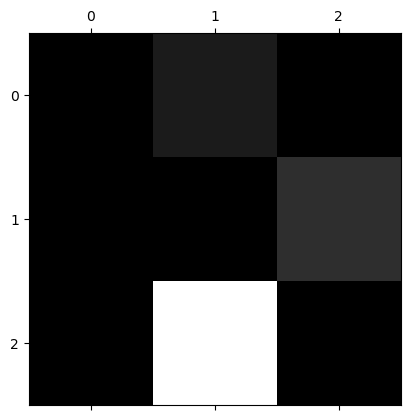

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load a sample dataset (Iris dataset with 3 classes)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Get predictions using cross-validation
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

# Compute the confusion matrix
conf_mx = confusion_matrix(y_train, y_train_pred)

# Sum of each row (axis=1 means summing across columns)
rows_sums = conf_mx.sum(axis=1, keepdims=True)

# Normalize the confusion matrix by dividing each element by the sum of its row
norm_conf_mx = conf_mx / rows_sums

# Set the diagonal values to 0, to exclude them from the visualization
np.fill_diagonal(norm_conf_mx, 0)

# Visualize the normalized confusion matrix using a grayscale colormap
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


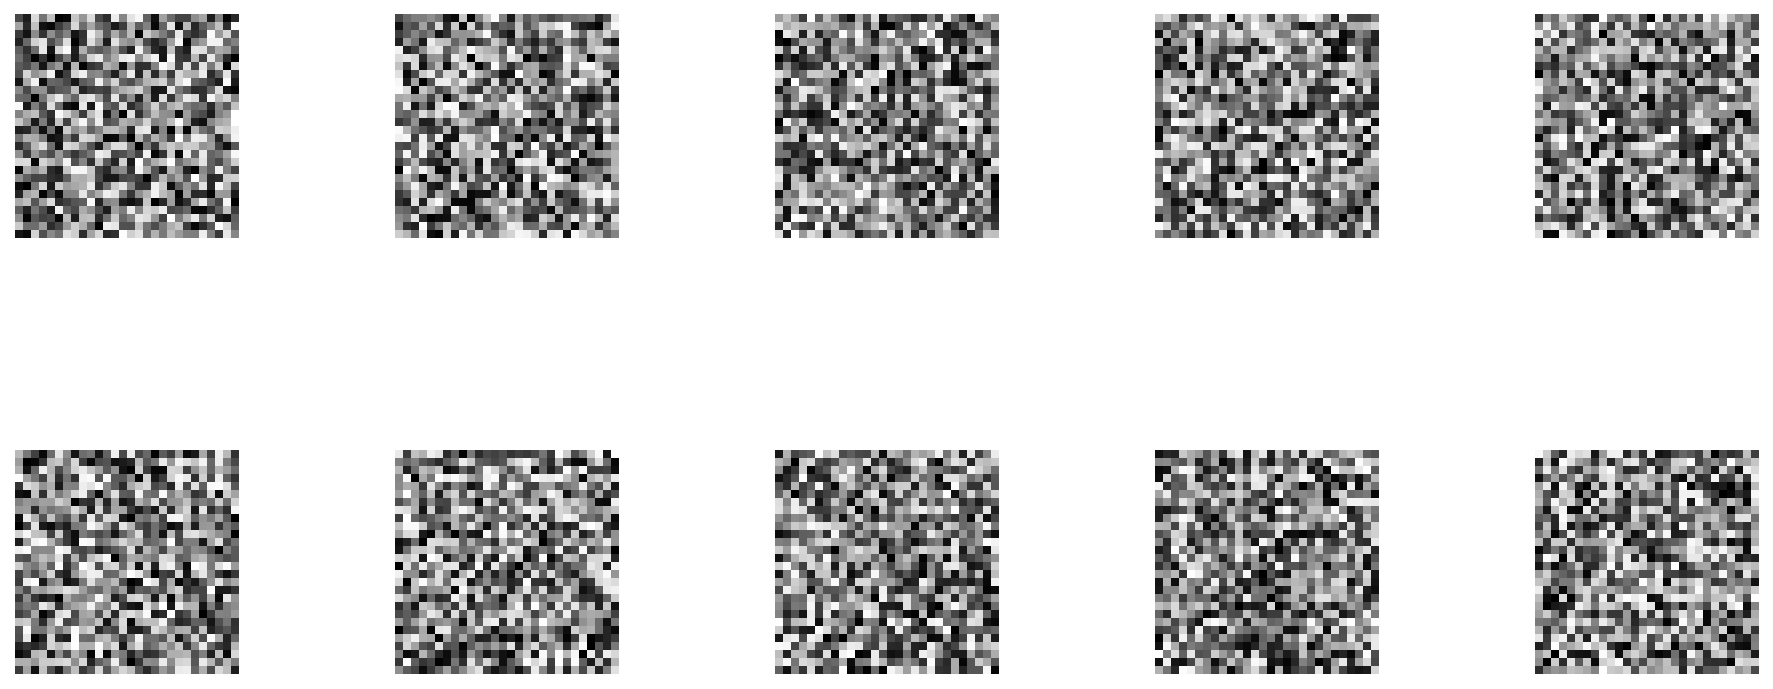

In [48]:
import matplotlib.pyplot as plt
import numpy as np

def plot_digits(instances, images_per_row=5):
    """Plots a grid of digits (28x28 images) with better clarity"""
    size = 28  # MNIST digits are 28x28 pixels
    images_per_column = int(np.ceil(len(instances) / images_per_row))
    
    # Create a subplot with a grid and increase the figure size and dpi for clarity
    fig, axes = plt.subplots(images_per_column, images_per_row, figsize=(images_per_row * 3, images_per_column * 3), dpi=150)
    
    # Flatten axes array for easier indexing
    axes = axes.ravel()
    
    # Plot each image
    for i in range(len(instances)):
        axes[i].imshow(instances[i].reshape(size, size), cmap="gray", interpolation='nearest')  # High contrast with nearest interpolation
        axes[i].axis("off")  # Hide the axis
    
    # Turn off axes for any extra subplots if there are more axes than images
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")
    
    # Adjust spacing between subplots (wider space for better clarity)
    plt.subplots_adjust(wspace=0.7, hspace=0.7)
    plt.show()

# Example data (replace this with your actual dataset)
instances = np.random.rand(10, 28*28)  # 10 random images as an example

# Plot the digits
plot_digits(instances)


# MultiplabelClassification

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
import warnings

# Step 1: Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(int)  # Convert target labels to integers

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create multi-label target array
y_train_large = (y_train >= 7)  # 1 if the label is >= 7, else 0
y_train_odd = (y_train % 2 == 1)  # 1 if the label is odd, else 0
y_multilabel = np.c_[y_train_large, y_train_odd]  # Stack the labels into a multi-label array

# Step 4: Train KNN classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)  # Fit the classifier with multi-label data

# Step 5: Make a prediction (use .iloc to select the first sample correctly)
some_digit = X_train.iloc[0]  # Use .iloc to select the first row (the first sample)
prediction = knn_clf.predict([some_digit])  # Predict for the selected digit

# Output the prediction
print(prediction)

[[False  True]]


C:\Users\d949496\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
from sklearn.metrics import f1_score

# Step 1: Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(int)  # Convert target labels to integers

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create multi-label target array
y_train_large = (y_train >= 7)  # 1 if the label is >= 7, else 0
y_train_odd = (y_train % 2 == 1)  # 1 if the label is odd, else 0
y_multilabel = np.c_[y_train_large, y_train_odd]  # Stack the labels into a multi-label array

# Step 4: Train KNN classifier
knn_clf = KNeighborsClassifier()

# Step 5: Perform cross-validation and get the predictions
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

# Step 6: Calculate the F1 score (macro average) for multi-label classification
f1 = f1_score(y_multilabel, y_train_knn_pred, average="macro")

# Output the F1 score
print("F1 Score (Macro Average):", f1)

F1 Score (Macro Average): 0.9759770524441204


# Multioutput Classification

C:\Users\d949496\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


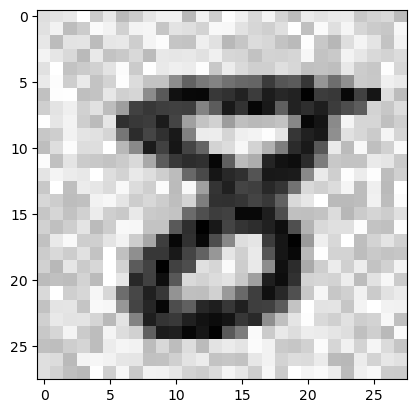

Predicted Label: 8


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add random noise to the images (for both training and testing)
noise_train = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise_train

noise_test = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise_test

# Use the original labels (not the noisy data) for training and testing
y_train_mod = y_train
y_test_mod = y_test

# Initialize the KNN classifier
knn_clf = KNeighborsClassifier()

# Train the classifier with the noisy images
knn_clf.fit(X_train_mod, y_train_mod)

# Pick an index from the test set to visualize and predict
some_index = 0  # You can change this to any index you want to test

# Predict the clean digit (predict on the noisy test image)
clean_digit = knn_clf.predict([X_test_mod.iloc[some_index]])

# Function to plot the digit
def plot_digit(digit_data):
    # Convert the digit data (Series) into a numpy array and reshape it
    digit_image = digit_data.values.reshape(28, 28)  # Convert to numpy and reshape to 28x28 pixels
    plt.imshow(digit_image, cmap=plt.cm.binary)  # Display the digit as a grayscale image
    plt.show()

# Plot the noisy digit
plot_digit(X_test_mod.iloc[some_index])  # Visualize the noisy test digit
print(f"Predicted Label: {clean_digit[0]}")


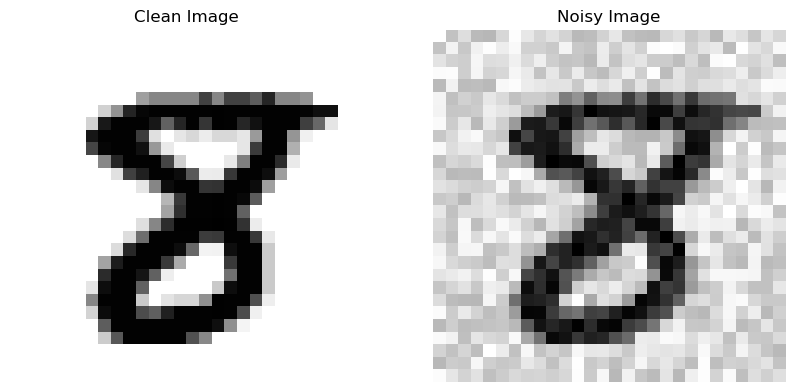

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add random noise to the images (for both training and testing)
noise_train = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise_train

noise_test = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise_test

# Pick an index from the test set to visualize and compare
some_index = 0  # You can change this to any index you want to test

# Function to plot the clean and noisy digit side by side
def plot_digit_comparison(clean_data, noisy_data):
    # Reshape both images (clean and noisy) into 28x28 pixels
    clean_image = clean_data.values.reshape(28, 28)
    noisy_image = noisy_data.values.reshape(28, 28)
    
    # Set up the plot with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Plot the clean image
    axes[0].imshow(clean_image, cmap=plt.cm.binary)
    axes[0].set_title("Clean Image")
    axes[0].axis('off')  # Turn off axis
    
    # Plot the noisy image
    axes[1].imshow(noisy_image, cmap=plt.cm.binary)
    axes[1].set_title("Noisy Image")
    axes[1].axis('off')  # Turn off axis
    
    plt.show()

# Get the clean and noisy data for the specified index
clean_data = X_test.iloc[some_index]
noisy_data = X_test_mod.iloc[some_index]

# Plot both clean and noisy images side by side
plot_digit_comparison(clean_data, noisy_data)
